# Data Files Exploration from Different Glider Processing Toolboxes

1. Link to Pyglider *.nc output files [here](https://github.com/c-proof/pyglider/tree/main/tests/expected)
3. Link to PGTP output *.nc files [here](https://www.mungliders.com/missions)


In [1]:
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import gsw

In [3]:
print(gsw.sound_speed(35,4,6000))

1570.1336577854236


## Memorial University PGTP toolbox output
https://github.com/OceanGNS/PGPT

In [79]:
# Load PGTP Realtime and Delayed Mode Profile 

#processing_mode = 'delayed'  # or realtime
#deployment_name = 'batray_20230317'
#nc_path = '/Users/research/Documents/GitHub/gliderProcessing/glider_data/'+ deployment_name + '/'+ processing_mode + '/nc/'
#file_pattern = nc_path + '*{}*.nc'.format('trajectory')


nc_path = '/Users/nicolaioppelnbronikowski/Desktop/Glider_Toolbox_NC_FileExploration/PGPT/'
print(glob.glob(nc_path+'/*.nc'))

fpattern1 = nc_path + '*{}*.nc'.format('214-3-158_realtime')
filename = sorted(glob.glob(fpattern1))[0]  
ds = xr.open_dataset(filename, engine='netcdf4', decode_times=False) # compliant US IOOS GDAC v3.0 standard https://gliders.ioos.us 
dsr = xr.open_dataset(filename, engine='netcdf4', decode_times=False, group='glider_record') # raw data contained
realtime_file = xr.merge([ds, dsr]) # Merge the datasets
data_rf = realtime_file.sortby('time').to_dataframe().reset_index()

fpattern2 = nc_path + '*{}*.nc'.format('214-3-158_delayed')
filename = sorted(glob.glob(fpattern2))[0]  
ds = xr.open_dataset(filename, engine='netcdf4', decode_times=False) # compliant US IOOS GDAC v3.0 standard https://gliders.ioos.us 
dsr = xr.open_dataset(filename, engine='netcdf4', decode_times=False, group='glider_record') # raw data contained
delayed_file = xr.merge([ds, dsr]) # Merge the datasets
data_df = delayed_file.sortby('time').to_dataframe().reset_index()

# length of realtime table
print('\n',len(data_rf))

# length of delayed mode record => a lot more data
print(len(data_df))

['/Users/nicolaioppelnbronikowski/Desktop/Glider_Toolbox_NC_FileExploration/PGPT/unit_334-2023-214-3-158_delayed.nc', '/Users/nicolaioppelnbronikowski/Desktop/Glider_Toolbox_NC_FileExploration/PGPT/unit_334_delayed_trajectory.nc', '/Users/nicolaioppelnbronikowski/Desktop/Glider_Toolbox_NC_FileExploration/PGPT/unit_334_realtime_trajectory.nc', '/Users/nicolaioppelnbronikowski/Desktop/Glider_Toolbox_NC_FileExploration/PGPT/unit_334-2023-214-3-158_realtime.nc']

 1483
11939


In [80]:
# Lets print  both of the files
data_rf # entries between raw and processed data preserved (don't worry too much about the nan's in this truncated view)

,time,traj_strlen,lat,lon,u,v,time_uv,lat_uv,lon_uv,conductivity,...,m_water_depth,sci_flbb_bb_units,sci_flbb_chlor_units,sci_m_present_secs_into_mission,sci_water_cond,sci_water_pressure,sci_water_temp,x_ice_abort_activated,x_stuck_depth,sci_water_depth
0,1.692230e+09,1,NaN,NaN,NaN,NaN,1.692230e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.692231e+09,1,NaN,NaN,NaN,NaN,1.692231e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.692231e+09,1,NaN,NaN,NaN,NaN,1.692231e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.692231e+09,1,NaN,NaN,0.045691,0.023067,1.692231e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.692231e+09,1,NaN,NaN,NaN,NaN,1.692231e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1.692249e+09,1,NaN,NaN,NaN,NaN,1.692249e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1479,1.692249e+09,1,NaN,NaN,NaN,NaN,1.692249e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,1.692249e+09,1,NaN,NaN,NaN,NaN,1.692249e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,1.692249e+09,1,NaN,NaN,NaN,NaN,1.692249e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
data_df # dealyed mode data 

,time,traj_strlen,lat,lon,u,v,time_uv,lat_uv,lon_uv,conductivity,...,u_flbb_chlor_do,u_flbb_chlor_sf,u_flbbcd_bb_cwo,u_flbbcd_bb_sf,u_flbbcd_cdom_cwo,u_flbbcd_cdom_sf,u_flbbcd_chlor_cwo,u_flbbcd_chlor_sf,x_dr_state,sci_water_depth
0,1.692230e+09,1,NaN,NaN,NaN,NaN,1.692230e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
1,1.692230e+09,1,NaN,NaN,NaN,NaN,1.692230e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.692231e+09,1,NaN,NaN,NaN,NaN,1.692231e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,1.692231e+09,1,NaN,NaN,NaN,NaN,1.692231e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.267704
4,1.692231e+09,1,NaN,NaN,NaN,NaN,1.692231e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.267704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,1.692249e+09,1,NaN,NaN,NaN,NaN,1.692249e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.678424
11935,1.692249e+09,1,NaN,NaN,NaN,NaN,1.692249e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.678424
11936,1.692249e+09,1,NaN,NaN,NaN,NaN,1.692249e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.678424
11937,1.692249e+09,1,NaN,NaN,NaN,NaN,1.692249e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.678424


In [82]:
# Print a list of profile id's that can be used to query and maybe grid the glider profiles by.
# Each profile would have a range of pressures and realtime and delayed have same number of profiles

uprofs_rf = np.unique(data_rf['profile_id'][~np.isnan(data_rf['profile_id'])])
uprofs_df = np.unique(data_df['profile_id'][~np.isnan(data_df['profile_id'])])
print(uprofs_rf,len(uprofs_rf))
print(uprofs_df,len(uprofs_df))

# However the ranges are different because the delayed files counter has the whole list of data for counting profiles, realtime does not.

[43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56.] 14
[109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122.] 14


In [83]:
# Lets have a look at what flags realtime and delayed mode processing provide
print(ds.salinity_qc) # so we have flags 1, 2, 3, 4, 9

# QC'd data
idx = ~np.isnan(data_df['temperature_qc']) & data_df['temperature_qc']==0
print('\n',len(data_df['temperature_qc']),len(data_df['temperature_qc'][idx]))

<xarray.DataArray 'salinity_qc' (time: 11939)> Size: 96kB
[11939 values with dtype=int64]
Coordinates:
  * time     (time) float64 96kB 1.692e+09 1.692e+09 ... 1.692e+09 1.692e+09
Attributes:
    flag_values:    1, 2, 3, 4, 9
    long_name:      salinity Quality Flag
    standard_name:  sea_water_practical_salinity status_flag
    flag_meanings:  no_qc_performed good_data probably_good_data bad_data_tha...
    valid_max:      9
    valid_min:      0
    comment:        Data underwent quartod range, spike, rate of change and f...

 11939 2591


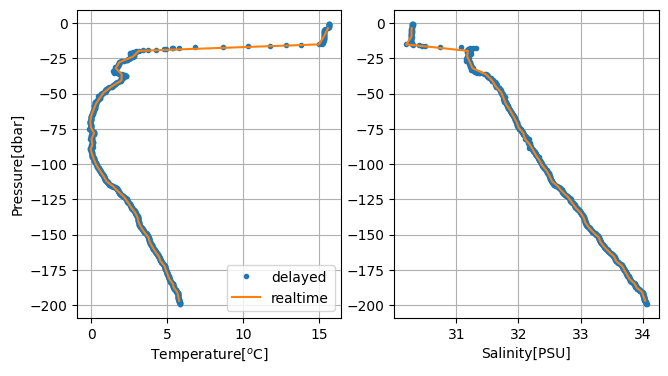

In [84]:
# lets just plot T-S for the first profile
fig, ax = plt.subplots(1,2,figsize=(7.5, 4))
idx = (data_df['profile_id']==uprofs_df[0]) & ~np.isnan(data_df['pressure'])
ax[0].plot(data_df['temperature'][idx], -data_df['pressure'][idx], '.', label='delayed')
idx = (data_rf['profile_id']==uprofs_rf[0]) & (~np.isnan(data_rf['pressure']))
ax[0].plot(data_rf['temperature'][idx], -data_rf['pressure'][idx], '-', label='realtime')
ax[0].set_ylabel('Pressure[dbar]')
ax[0].set_xlabel('Temperature[$^o$C]')
#ax[0].set_title('File ' + fpattern1[-22:-4])  # Adjusted slicing based on your example
ax[0].legend(loc='best')
ax[0].grid(True)

# Plot data for the second datase
idx = (data_df['profile_id']==uprofs_df[0]) & ~np.isnan(data_df['pressure'])
ax[1].plot(data_df['salinity'][idx], -data_df['pressure'][idx], '.', label='delayed')

idx = (data_rf['profile_id']==uprofs_rf[0]) & (~np.isnan(data_rf['pressure']))
ax[1].plot(data_rf['salinity'][idx], -data_rf['pressure'][idx], '-', label='realtime')
#ax[1].set_ylabel('Pressure[dbar]')
ax[1].set_xlabel('Salinity[PSU]')
#ax[1].set_title('File ' + fpattern1[-22:-4])  # Adjusted slicing based on your example
#ax[1].legend(loc='best')
ax[1].grid(True)

In [85]:
# convert unix (sec since 1970) to datetime64 timestamp
data_rf['timestamp'] = pd.to_datetime(data_rf['time'], unit='s')
data_df['timestamp'] = pd.to_datetime(data_df['time'], unit='s')

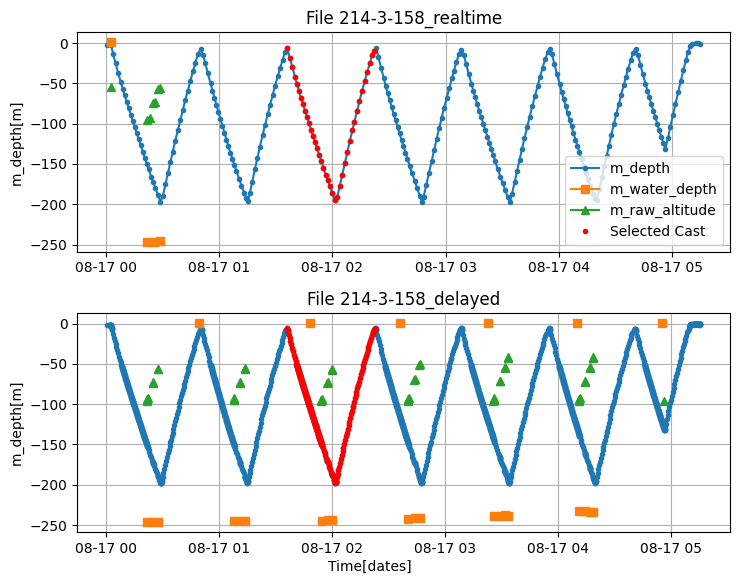

In [111]:
fig, ax = plt.subplots(2, 1, figsize=(7.5, 6))
idnan = ~np.isnan(data_rf['m_depth']) 
ax[0].plot(data_rf['timestamp'][idnan], -data_rf['m_depth'][idnan], '.-', label='m_depth')
ax[0].plot(data_rf['timestamp'], -data_rf['m_water_depth'], '-s', label='m_water_depth')
ax[0].plot(data_rf['timestamp'], -data_rf['m_raw_altitude'], '-^', label='m_raw_altitude')
ax[0].set_ylabel('m_depth[m]')
ax[0].set_title('File ' + fpattern1[-22:-4])  # Adjusted slicing based on your example

idx = (data_rf['profile_id']==uprofs_rf[4]) | (data_rf['profile_id']==uprofs_rf[5])
ax[0].plot(data_rf['timestamp'][idx], -data_rf['m_depth'][idx], '.r', label='Selected Cast')
ax[0].legend(loc='best')
ax[0].grid(True)


# Plot data for the second dataset
idnan = ~np.isnan(data_df['m_depth']) 
ax[1].plot(data_df['timestamp'][idnan], -data_df['m_depth'][idnan], '.-', label='m_depth')
ax[1].plot(data_df['timestamp'], -data_df['m_water_depth'], 's', label='m_water_depth')
ax[1].plot(data_df['timestamp'], -data_df['m_raw_altitude'], '^', label='m_raw_altitude')
ax[1].set_ylabel('m_depth[m]')
ax[1].set_title('File ' + fpattern2[-21:-4])  # Adjusted slicing based on your example
ax[1].grid(True)
fig.text(0.5, 0.04, 'Time[dates]', ha='center')
plt.tight_layout(rect=[0, 0.04, 1, 1])


idx = (data_df['profile_id']==uprofs_df[4]) | (data_df['profile_id']==uprofs_df[5])
ax[1].plot(data_df['timestamp'][idx], -data_df['m_depth'][idx], '.r', label='Selected Cast')

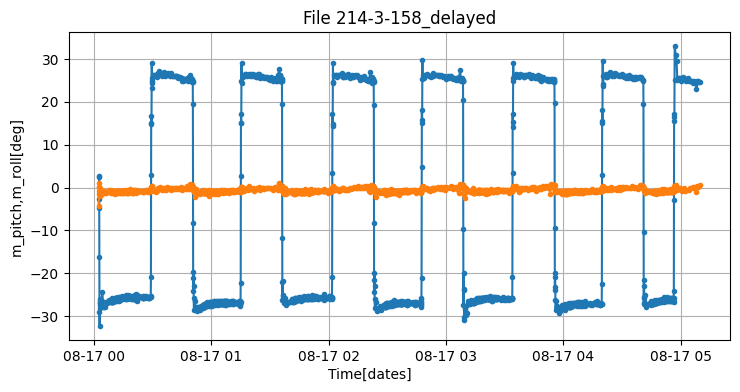

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
#ax[0].plot(data_rf['timestamp'], data_rf['m_pitch'], '.-', label='m_pitch')
#ax[0].plot(data_rf['timestamp'], data_rf['m_roll'], '-s', label='m_roll')
#ax[0].set_ylabel('m_pitch,m_roll[deg]')
#ax[0].set_title('File ' + fpattern1[-22:-4])  
#ax[0].legend(loc='best')
#ax[0].grid(True)

# Plot data for the second dataset
idnan = ~np.isnan(data_df['m_pitch']) | ~np.isnan(data_df['m_roll'])
ax.plot(data_df['timestamp'][idnan], data_df['m_pitch'][idnan], '.-', label='m_pitch')
ax.plot(data_df['timestamp'][idnan], data_df['m_roll'][idnan], '.-', label='m_roll')
ax.set_ylabel('m_pitch,m_roll[deg]')
ax.set_title('File ' + fpattern2[-21:-4]) 
ax.grid(True)
fig.text(0.5, 0.04, 'Time[dates]', ha='center')
plt.tight_layout(rect=[0, 0.04, 1, 1])

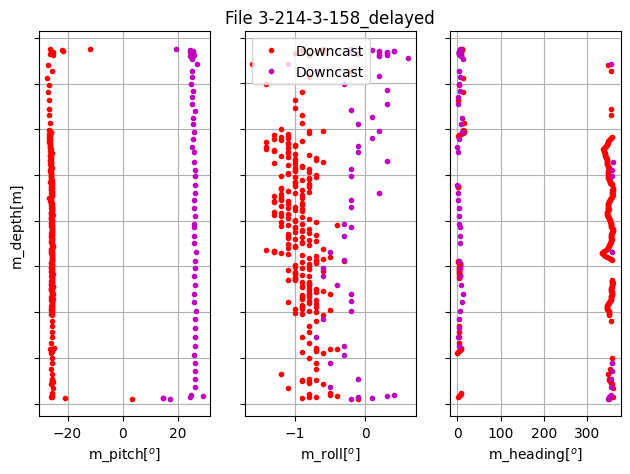

In [112]:
fig, ax = plt.subplots(1,3,figsize=(7.5, 5))

idx = (data_df['profile_id']==uprofs_df[4])
ax[0].plot(data_df['m_pitch'][idx], -data_df['m_depth'][idx], '.r', label='Downcast')
idx = (data_df['profile_id']==uprofs_df[5])
ax[0].plot(data_df['m_pitch'][idx], -data_df['m_depth'][idx], '.m', label='Downcast')
ax[0].set_yticklabels('')
ax[0].set_ylabel('m_depth[m]')
ax[0].set_xlabel('m_pitch[$^o$]')
ax[0].grid(True)

# Plot data for the second datase
idx = (data_df['profile_id']==uprofs_df[4])
ax[1].plot(data_df['m_roll'][idx], -data_df['m_depth'][idx], '.r', label='Downcast')
idx = (data_df['profile_id']==uprofs_df[5])
ax[1].plot(data_df['m_roll'][idx], -data_df['m_depth'][idx], '.m', label='Downcast')
ax[1].set_xlabel('m_roll[$^o$]')
ax[1].set_yticklabels('')
ax[1].legend(loc='best')
ax[1].grid(True)
ax[1].set_title('File ' + filename[-22:-3])  


# Plot data for the second datase
idx = (data_df['profile_id']==uprofs_df[4])
ax[2].plot(data_df['m_heading'][idx], -data_df['m_depth'][idx], '.r', label='Downcast')
idx = (data_df['profile_id']==uprofs_df[5])
ax[2].plot(data_df['m_heading'][idx], -data_df['m_depth'][idx], '.m', label='Downcast')
ax[2].set_xlabel('m_heading[$^o$]')
ax[2].set_yticklabels('')
ax[2].grid(True)

## Explorer Pyglider
https://github.com/c-proof/pyglider

In [114]:
nc_path = '/Users/nicolaioppelnbronikowski/Desktop/Glider_Toolbox_NC_FileExploration/Pyglider/SeaExplorerExample/'
print(glob.glob(nc_path+'/*.nc'))

fpattern1 = nc_path + '*{}*.nc'.format('eva')
filename1 = sorted(glob.glob(fpattern1))[0]  
ds = xr.open_dataset(filename1, engine='netcdf4', decode_times=False) # compliant US IOOS GDAC v3.0 standard https://gliders.ioos.us 
dsf = ds.sortby('time').to_dataframe().reset_index()
dsf['time'] = pd.to_datetime(dsf['time'], unit='ms')
print('\n',dsf['time'][0])

['/Users/nicolaioppelnbronikowski/Desktop/Glider_Toolbox_NC_FileExploration/Pyglider/SeaExplorerExample/dfo-bb046-20200908.nc', '/Users/nicolaioppelnbronikowski/Desktop/Glider_Toolbox_NC_FileExploration/Pyglider/SeaExplorerExample/dfo-eva035-20190718.nc']

 2019-07-21 23:25:02.737000


In [115]:
dsf

,time,latitude,longitude,heading,pitch,roll,conductivity,temperature,pressure,chlorophyll,...,oxygen_concentration,temperature_oxygen,depth,distance_over_ground,profile_index,profile_direction,salinity,potential_density,density,potential_temperature
0,2019-07-21 23:25:02.737,48.909483,-130.604983,108.862196,40.689173,0.318625,0.44459,15.6919,0.19,0.3741,...,309.762500,15.667625,0.188390,0.000000,0.0,0.0,2.935607,1001.257030,1001.365093,15.691878
1,2019-07-21 23:25:32.745,48.909483,-130.604983,87.089850,-27.979242,6.434980,4.04482,15.6737,0.94,0.3741,...,309.762500,15.667625,0.932034,0.000000,0.0,0.0,32.200327,1023.673674,1023.574849,15.673557
2,2019-07-21 23:26:02.753,48.909483,-130.604983,88.107513,-16.004794,2.298459,4.04645,15.6747,0.66,0.4128,...,309.762500,15.667625,0.654407,0.000000,0.0,0.0,32.214086,1023.684019,1023.583845,15.674600
3,2019-07-21 23:26:32.668,48.909483,-130.604983,95.218744,-10.983314,-3.749280,4.05862,15.6824,0.30,0.4128,...,309.762500,15.667625,0.297458,0.000000,0.0,0.0,32.315988,1023.760636,1023.657969,15.682354
4,2019-07-21 23:27:02.674,48.909517,-130.604867,86.270239,-33.605072,-5.855526,4.05907,15.6774,1.23,0.4386,...,309.927824,15.657172,1.219575,0.009297,0.0,0.0,32.323731,1023.767730,1023.669051,15.677213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516,2019-07-23 21:23:46.375,49.126367,-130.936267,55.013125,-0.605625,-1.017125,0.00112,32.2599,-0.04,-0.1032,...,227.201250,33.620375,-0.039660,103.356224,-0.0,-0.0,0.003118,994.947753,995.436392,32.259909
5517,2019-07-23 21:24:16.383,49.126367,-130.936267,55.102343,-0.909276,-1.952423,0.00112,32.2693,-0.03,-0.0516,...,227.201250,33.620375,-0.029745,103.356224,-0.0,-0.0,0.003117,994.944732,995.433668,32.269307
5518,2019-07-23 21:24:46.390,49.126367,-130.936267,68.077350,-0.476040,-0.876360,0.00112,32.2090,-0.03,0.0903,...,227.201250,33.620375,-0.029745,103.356224,-0.0,-0.0,0.003122,994.964102,995.451410,32.209007
5519,2019-07-23 21:25:16.396,49.126367,-130.936267,64.873492,-1.861232,-1.735392,0.00112,32.1716,-0.04,-0.0645,...,227.201250,33.620375,-0.039660,103.356224,-0.0,-0.0,0.003125,994.976101,995.462355,32.171609


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22.] 23


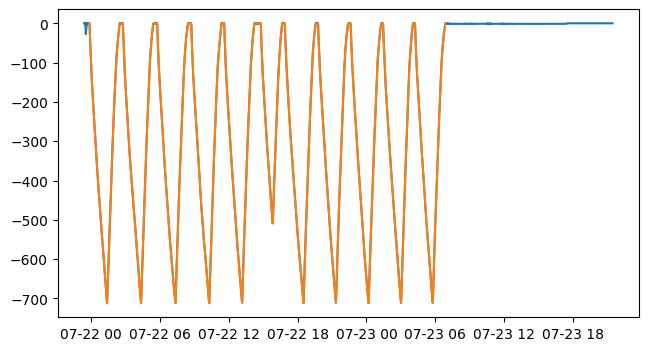

In [116]:
fig, ax = plt.subplots(1,1,figsize=(7.5, 4))
# plot all pressure data
plt.plot(dsf.time,-dsf.pressure)

# only select valid profiles
idx = dsf['profile_index']>0
plt.plot(dsf.time[idx],-dsf.pressure[idx])

uprofs = np.unique(dsf['profile_index'][~np.isnan(dsf['profile_index'])])
print(uprofs,len(uprofs))

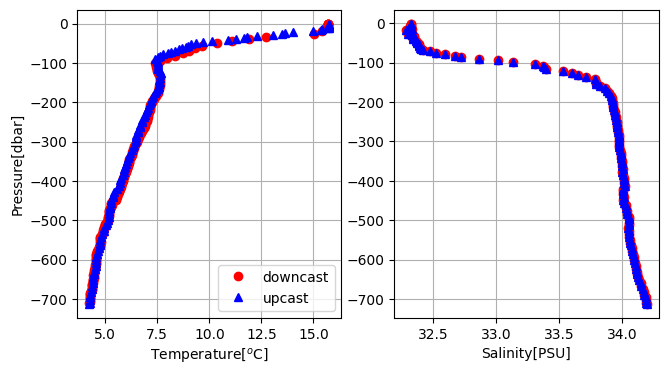

In [117]:
# lets just plot T-S for the first profile
fig, ax = plt.subplots(1,2,figsize=(7.5, 4))
idx = (dsf['profile_index']==uprofs[3])
ax[0].plot(dsf['temperature'][idx], -dsf['pressure'][idx], 'or', label='downcast')
idx = (dsf['profile_index']==uprofs[4])
ax[0].plot(dsf['temperature'][idx], -dsf['pressure'][idx], '^b', label='upcast')
ax[0].set_ylabel('Pressure[dbar]')
ax[0].set_xlabel('Temperature[$^o$C]')
ax[0].legend(loc='best')
ax[0].grid(True)

# Plot data for the second datase

iidx = (dsf['profile_index']==uprofs[3])
ax[1].plot(dsf['salinity'][idx], -dsf['pressure'][idx], 'or', label='downcast')
idx = (dsf['profile_index']==uprofs[4])
ax[1].plot(dsf['salinity'][idx], -dsf['pressure'][idx], '^b', label='upcast')

ax[1].set_xlabel('Salinity[PSU]')
ax[1].grid(True)

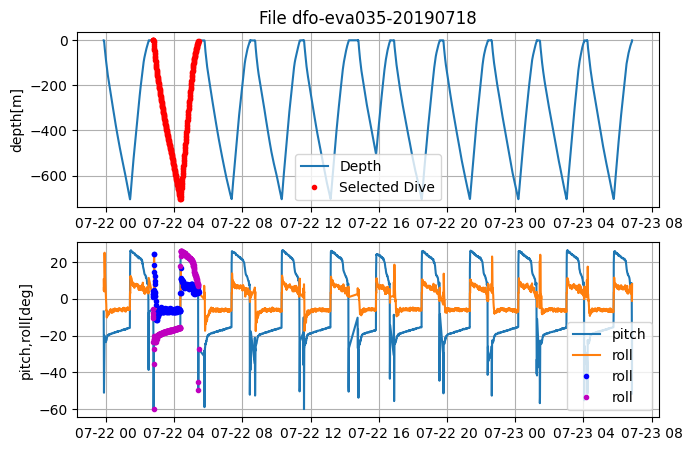

In [118]:
fig, ax = plt.subplots(2, 1, figsize=(7.5, 5))
idx = dsf['profile_index']>0
ax[0].plot(dsf['time'][idx], -dsf['depth'][idx], '-', label='Depth')
idx = (dsf['profile_index']==uprofs[3]) | (dsf['profile_index']==uprofs[4])
ax[0].plot(dsf['time'][idx], -dsf['depth'][idx], '.r', label='Selected Dive')
ax[0].set_title('File ' + filename1[-22:-3])  
ax[0].set_ylabel('depth[m]')
ax[0].legend(loc='best')
ax[0].grid(True)

idx = dsf['profile_index']>0
ax[1].plot(dsf['time'][idx], dsf['pitch'][idx], '-', label='pitch')
ax[1].plot(dsf['time'][idx], dsf['roll'][idx], '-', label='roll')

idx2 = (dsf['profile_index']==uprofs[3]) | (dsf['profile_index']==uprofs[4])
ax[1].plot(dsf['time'][idx2], dsf['roll'][idx2], '.b', label='roll')
ax[1].plot(dsf['time'][idx2], dsf['pitch'][idx2], '.m', label='roll')
ax[1].set_ylabel('pitch,roll[deg]')
ax[1].legend(loc='best')
ax[1].grid(True)

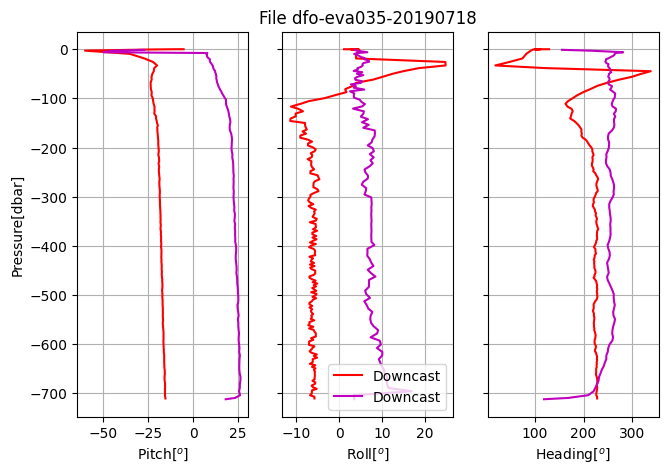

In [119]:
fig, ax = plt.subplots(1,3,figsize=(7.5, 5))
idx = (dsf['profile_index']==uprofs[3])
ax[0].plot(dsf['pitch'][idx], -dsf['pressure'][idx], 'r', label='Downcast')
idx = (dsf['profile_index']==uprofs[4])
ax[0].plot(dsf['pitch'][idx], -dsf['pressure'][idx], 'm', label='Downcast')
ax[0].set_ylabel('Pressure[dbar]')
ax[0].set_xlabel('Pitch[$^o$]')
ax[0].grid(True)

# Plot data for the second datase
idx = (dsf['profile_index']==uprofs[3])
ax[1].plot(dsf['roll'][idx], -dsf['pressure'][idx], 'r', label='Downcast')
idx = (dsf['profile_index']==uprofs[4])
ax[1].plot(dsf['roll'][idx], -dsf['pressure'][idx], 'm', label='Downcast')
ax[1].set_xlabel('Roll[$^o$]')
ax[1].set_yticklabels('')
ax[1].legend(loc='best')
ax[1].grid(True)
ax[1].set_title('File ' + filename1[-22:-3])  


# Plot data for the second datase
idx = (dsf['profile_index']==uprofs[3])
ax[2].plot(dsf['heading'][idx], -dsf['pressure'][idx], 'r', label='Downcast')
idx = (dsf['profile_index']==uprofs[4])
ax[2].plot(dsf['heading'][idx], -dsf['pressure'][idx], 'm', label='Downcast')
ax[2].set_xlabel('Heading[$^o$]')
ax[2].set_yticklabels('')
ax[2].grid(True)